In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('../data/events.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df.head(5)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [5]:
df.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [7]:
#Give df an id to use
df['transactionid'] = np.arange(1, len(df) + 1)
df.head(10)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,1
1,1433224214164,992329,view,248676,2
2,1433221999827,111016,view,318965,3
3,1433221955914,483717,view,253185,4
4,1433221337106,951259,view,367447,5
5,1433224086234,972639,view,22556,6
6,1433221923240,810725,view,443030,7
7,1433223291897,794181,view,439202,8
8,1433220899221,824915,view,428805,9
9,1433221204592,339335,view,82389,10


In [8]:
#unique counts of each
print(f"Total events: {len(df):,}")
print(f"Unique visitors: {df['visitorid'].nunique():,}")
print(f"Unique items: {df['itemid'].nunique():,}")
print(f"\nEvent types:")
print(df['event'].value_counts())

Total events: 2,756,101
Unique visitors: 1,407,580
Unique items: 235,061

Event types:
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


In [9]:
#timestamp ms to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['day_of_week_num'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['week'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month
df.head(10)

,timestamp,visitorid,event,itemid,transactionid,date,hour,day_of_week,day_of_week_num,week,month
0,2015-06-02 05:02:12.117,257597,view,355908,1,2015-06-02,5,Tuesday,1,23,6
1,2015-06-02 05:50:14.164,992329,view,248676,2,2015-06-02,5,Tuesday,1,23,6
2,2015-06-02 05:13:19.827,111016,view,318965,3,2015-06-02,5,Tuesday,1,23,6
3,2015-06-02 05:12:35.914,483717,view,253185,4,2015-06-02,5,Tuesday,1,23,6
4,2015-06-02 05:02:17.106,951259,view,367447,5,2015-06-02,5,Tuesday,1,23,6
5,2015-06-02 05:48:06.234,972639,view,22556,6,2015-06-02,5,Tuesday,1,23,6
6,2015-06-02 05:12:03.240,810725,view,443030,7,2015-06-02,5,Tuesday,1,23,6
7,2015-06-02 05:34:51.897,794181,view,439202,8,2015-06-02,5,Tuesday,1,23,6
8,2015-06-02 04:54:59.221,824915,view,428805,9,2015-06-02,4,Tuesday,1,23,6
9,2015-06-02 05:00:04.592,339335,view,82389,10,2015-06-02,5,Tuesday,1,23,6


In [11]:
#df['day_of_week'].value_counts()

In [13]:
event_counts = df['event'].value_counts()
event_pct = df['event'].value_counts(normalize = True) * 100
event_summary = pd.DataFrame({
    'Count' : event_counts, 
    'Percentage': event_pct
})
print(event_summary)

               Count  Percentage
event                           
view         2664312   96.669607
addtocart      69332    2.515583
transaction    22457    0.814810


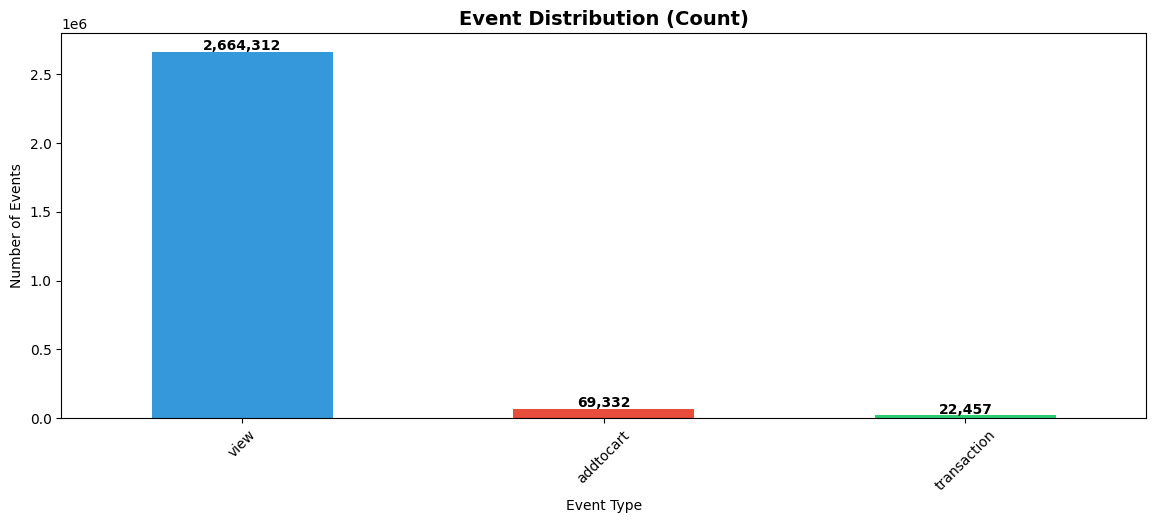

In [42]:
 # Create a simple bar chart
fig, ax= plt.subplots(figsize=(14, 5))

  # Bar chart - counts
event_counts.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c', '#2ecc71'])
ax.set_title('Event Distribution (Count)', fontsize=14, fontweight='bold')
ax.set_xlabel('Event Type')
ax.set_ylabel('Number of Events')
ax.tick_params(axis='x', rotation=45)

  # Add count labels on bars
for i, v in enumerate(event_counts):
    ax.text(i, v + 10000, f'{v:,}', ha='center', fontweight='bold')

plt.show()

In [20]:
#funnel drop off
total_events = len(df)
views = event_counts.get('view', 0)
carts = event_counts.get('addtocart', 0)
purchases = event_counts.get('transaction', 0)

print(f"View events: {views:,}")
print(f"Add to cart events: {carts:,}")
print(f"Transaction events: {purchases:,}\n")

if views > 0:
    print(f"View → Cart rate: {(carts/views)*100:.2f}%")
    print(f"View → Purchase rate: {(purchases/views)*100:.2f}%")
if carts > 0:
    print(f"Cart → Purchase rate: {(purchases/carts)*100:.2f}%")

View events: 2,664,312
Add to cart events: 69,332
Transaction events: 22,457

View → Cart rate: 2.60%
View → Purchase rate: 0.84%
Cart → Purchase rate: 32.39%


In [25]:
#Check for duplicates

duplicates = df.duplicated().sum()
print(f"Exact duplicate rows: {duplicates.sum():,}")

event_duplicates = df.duplicated(subset=['timestamp', 'visitorid', 'event', 'itemid'])
print(f"Duplicate events (same visitor, item, event, time): {event_duplicates.sum():,}")

if event_duplicates.sum() > 0:
    print("\nExample duplicates:")
    print(df[event_duplicates].head())

Exact duplicate rows: 0
Duplicate events (same visitor, item, event, time): 460

Example duplicates:
                    timestamp  visitorid      event  itemid  transactionid  \
22404 2015-06-01 17:46:21.440    1045411  addtocart  379647          22405   
34465 2015-06-02 19:43:43.925     366538  addtocart  252068          34466   
39738 2015-06-02 17:11:40.661     198153  addtocart   48715          39739   
41774 2015-06-02 18:47:48.154    1268755       view   60980          41775   
42469 2015-06-02 20:32:14.682     555487  addtocart  397642          42470   

             date  hour day_of_week  day_of_week_num  week  month  
22404  2015-06-01    17      Monday                0    23      6  
34465  2015-06-02    19     Tuesday                1    23      6  
39738  2015-06-02    17     Tuesday                1    23      6  
41774  2015-06-02    18     Tuesday                1    23      6  
42469  2015-06-02    20     Tuesday                1    23      6  


In [30]:
#users who purchased
purchasers = df[df['event'] == 'transaction']['visitorid'].unique()
print(f"Users who made purchases: {len(purchasers):,}")

#add to cart or just straight purchase
purchaser_data = df[df['visitorid'].isin(purchasers)]

#count events by user and event type
purchaser_pivot = purchaser_data.groupby(['visitorid', 'event']).size().unstack(fill_value=0)

#transactions but no addtocart
if 'transaction' in purchaser_pivot.columns and 'addtocart' in purchaser_pivot.columns:
    no_cart_purchases = ((purchaser_pivot['transaction'] > 0) &
                           (purchaser_pivot['addtocart'] == 0)).sum()
    print(f"Purchasers who NEVER added to cart: {no_cart_purchases:,}")
    print(f"Percentage: {(no_cart_purchases/len(purchasers)*100):.2f}%")
else:
    print("Cannot check cart consistency - missing event types")


#transaction w no matching itemid in views/carts
transaction_items = df[df['event'] == 'transaction']['itemid'].unique()
view_cart_items = df[df['event'].isin(['view', 'addtocart'])]['itemid'].unique()
orphan_transactions = set(transaction_items) - set(view_cart_items)
print(f"Items purchased but never viewed/carted: {len(orphan_transactions)}")

Users who made purchases: 11,719
Purchasers who NEVER added to cart: 1,143
Percentage: 9.75%
Items purchased but never viewed/carted: 1


In [32]:
#null values in key columns
print("Null values:")
print(df[['visitorid', 'event', 'itemid']].isnull().sum())

#timestamp validity
print(f"\nTimestamp range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Total duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

#negative or zero IDs
print(f"\nNegative visitor IDs: {(df['visitorid'] <= 0).sum()}")
print(f"Negative item IDs: {(df['itemid'] <= 0).sum()}")

#Check transaction IDs
print(f"\nTransactions with transaction ID: {df[df['event'] == 'transaction']['transactionid'].notna().sum()}")
print(f"Transactions WITHOUT transaction ID: {df[df['event'] == 'transaction']['transactionid'].isna().sum()}")

#Check for unusually active users (possible bots)
events_per_user = df.groupby('visitorid').size()
print(f"Average events per user: {events_per_user.mean():.2f}")
print(f"Median events per user: {events_per_user.median():.0f}")
print(f"Max events by single user: {events_per_user.max():,}")
print(f"\nUsers with 100+ events (possible bots): {(events_per_user >= 100).sum():,}")

Null values:
visitorid    0
event        0
itemid       0
dtype: int64

Timestamp range: 2015-05-03 03:00:04.384000 to 2015-09-18 02:59:47.788000
Total duration: 137 days

Negative visitor IDs: 3
Negative item IDs: 0

Transactions with transaction ID: 22457
Transactions WITHOUT transaction ID: 0
Average events per user: 1.96
Median events per user: 1
Max events by single user: 7,757

Users with 100+ events (possible bots): 417


In [33]:
quality_issues = []

if duplicates.sum() > 0:
    quality_issues.append(f"✗ {duplicates.sum():,} duplicate rows found")
else:
    print("✓ No duplicate rows")

if df.isnull().sum().sum() > 0:
    quality_issues.append(f"✗ {df.isnull().sum().sum():,} null values")
else:
    print("✓ No null values in critical columns")

if no_cart_purchases > 0:
    quality_issues.append(f"⚠ {no_cart_purchases:,} purchases without cart adds (may be valid direct purchases)")

if (events_per_user >= 100).sum() > 100:
    quality_issues.append(f"⚠ {(events_per_user >= 100).sum():,} possible bot users")

print(f"\n{'='*50}")
if quality_issues:
    print("Issues found:")
    for issue in quality_issues:
        print(issue)
else:
    print("✓ Data quality looks good!")

✓ No duplicate rows
✓ No null values in critical columns

Issues found:
⚠ 1,143 purchases without cart adds (may be valid direct purchases)
⚠ 417 possible bot users


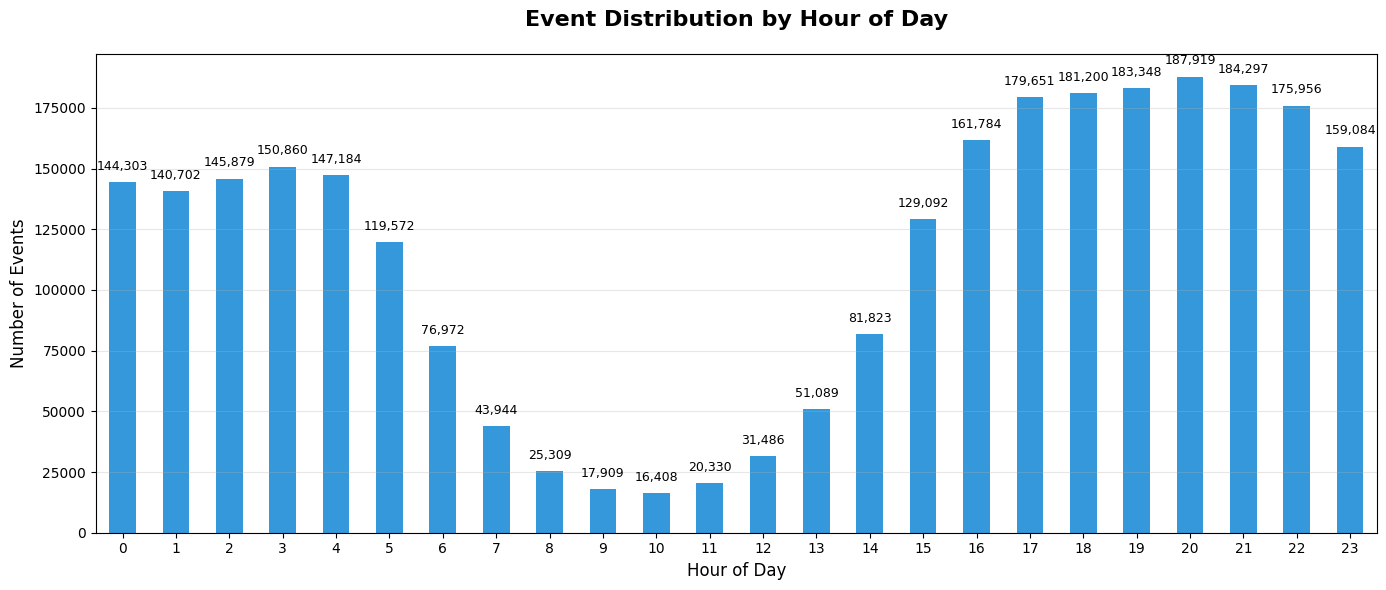

Peak hour: 20:00 with 187,919 events
Slowest hour: 10:00 with 16,408 events


In [ ]:
#events by hour graphs
hourly_events = df.groupby('hour').size()

fig, ax = plt.subplots(figsize=(14, 6))
hourly_events.plot(kind='bar', color='#3498db', ax=ax)
ax.set_title('Event Distribution by Hour of Day', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(hourly_events):
    ax.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Peak hour: {hourly_events.idxmax()}:00 with {hourly_events.max():,} events")
print(f"Slowest hour: {hourly_events.idxmin()}:00 with {hourly_events.min():,} events")

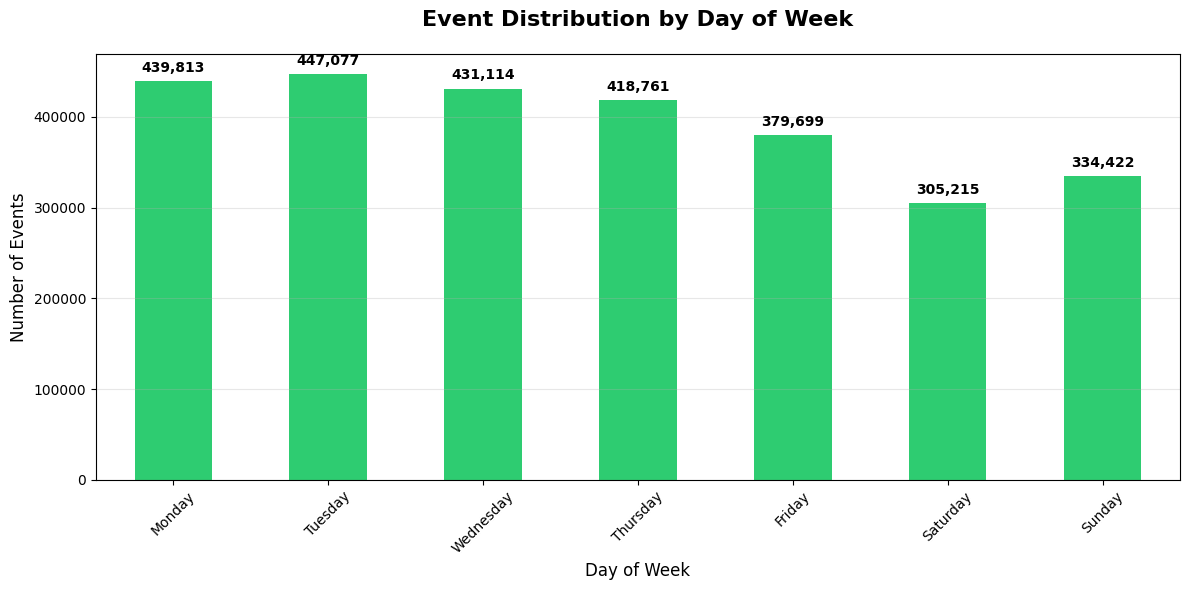

Busiest day: Tuesday with 447,077 events
Slowest day: Saturday with 305,215 events


In [35]:
#events by DOW graphs
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_events = df.groupby('day_of_week').size().reindex(day_order)

fig, ax = plt.subplots(figsize=(12, 6))
daily_events.plot(kind='bar', color='#2ecc71', ax=ax)
ax.set_title('Event Distribution by Day of Week', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.grid(axis='y', alpha=0.3)


for i, v in enumerate(daily_events):
    ax.text(i, v + 10000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Busiest day: {daily_events.idxmax()} with {daily_events.max():,} events")
print(f"Slowest day: {daily_events.idxmin()} with {daily_events.min():,} events")

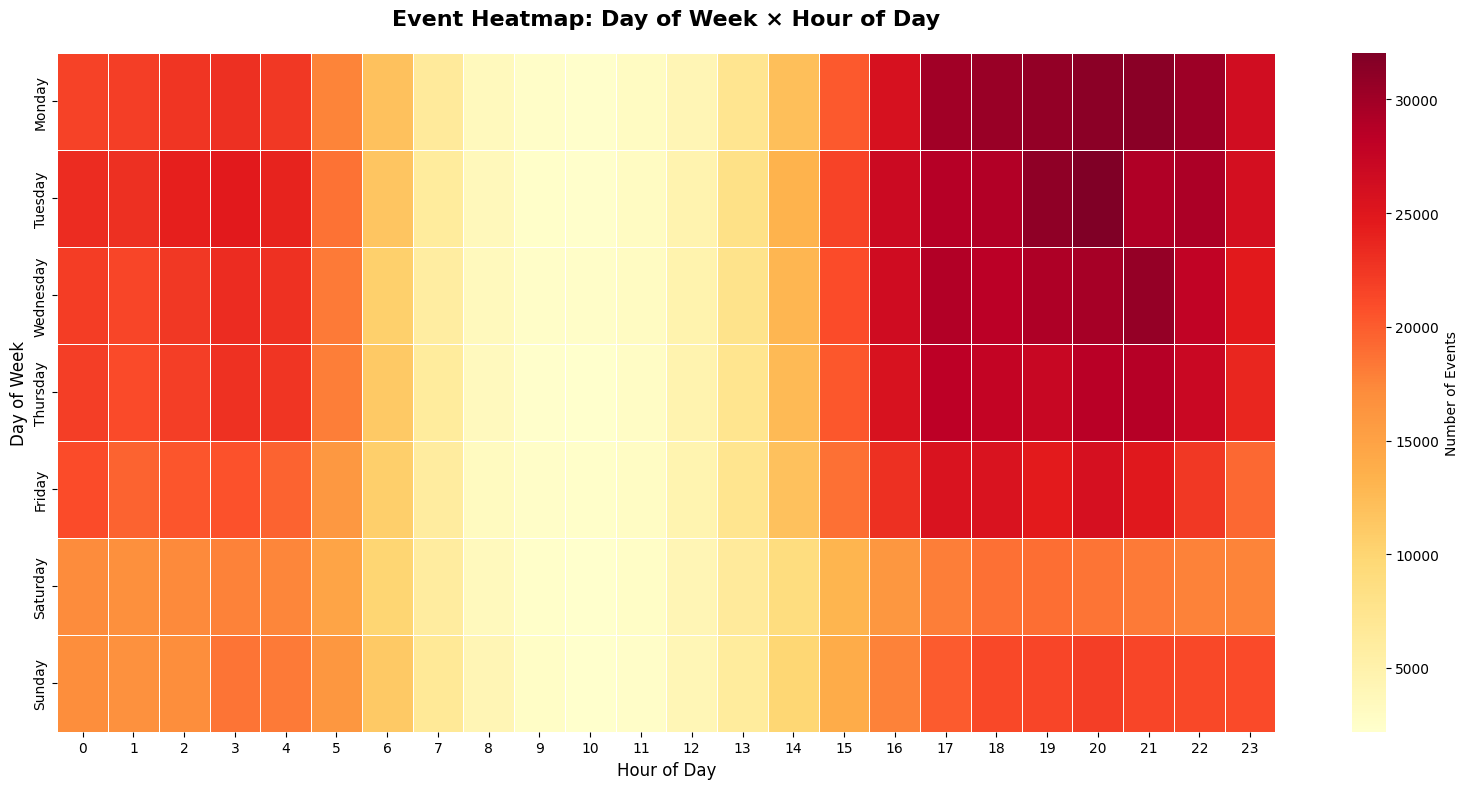

Peak traffic: Tuesday at 20:00 (32,051 events)


In [36]:
#heatmap - hour x dow

heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt=',.0f', cbar_kws={'label': 'Number of Events'}, linewidths=0.5)
plt.title('Event Heatmap: Day of Week × Hour of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

peak_day = heatmap_data.max(axis=1).idxmax()
peak_hour = heatmap_data.loc[peak_day].idxmax()
peak_value = heatmap_data.loc[peak_day, peak_hour]
print(f"Peak traffic: {peak_day} at {peak_hour}:00 ({peak_value:,} events)")

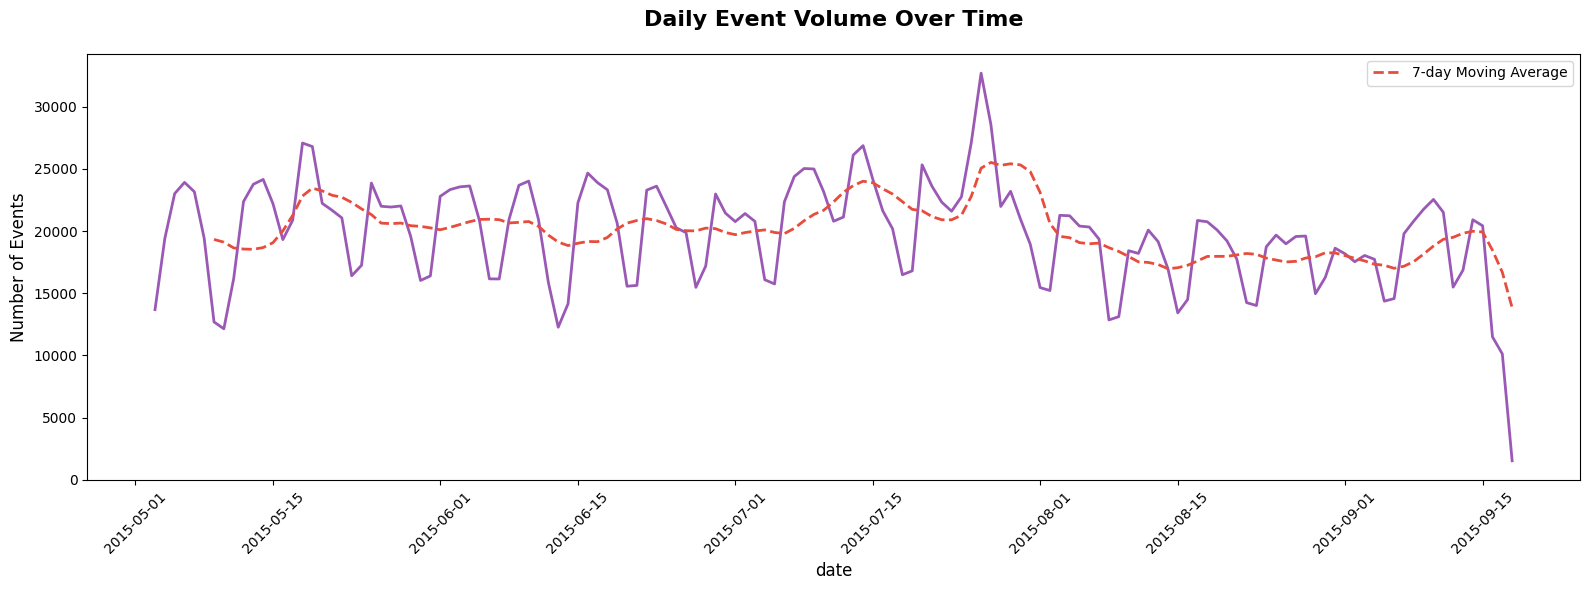

Date range: 2015-05-03 to 2015-09-18
Average daily events: 19,828
Peak day: 2015-07-26 (32,703 events)


In [37]:
#daily TS
daily_series = df.groupby('date').size()

fig, ax = plt.subplots(figsize=(16, 6))
daily_series.plot(ax=ax, color='#9b59b6', linewidth=2)
ax.set_title('Daily Event Volume Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.grid(alpha=0.3)

#7 day rolling average

daily_series.rolling(window=7).mean().plot(ax=ax, color='#e74c3c', linewidth=2, linestyle='--', label='7-day Moving Average')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Date range: {daily_series.index.min()} to {daily_series.index.max()}")
print(f"Average daily events: {daily_series.mean():,.0f}")
print(f"Peak day: {daily_series.idxmax()} ({daily_series.max():,} events)")

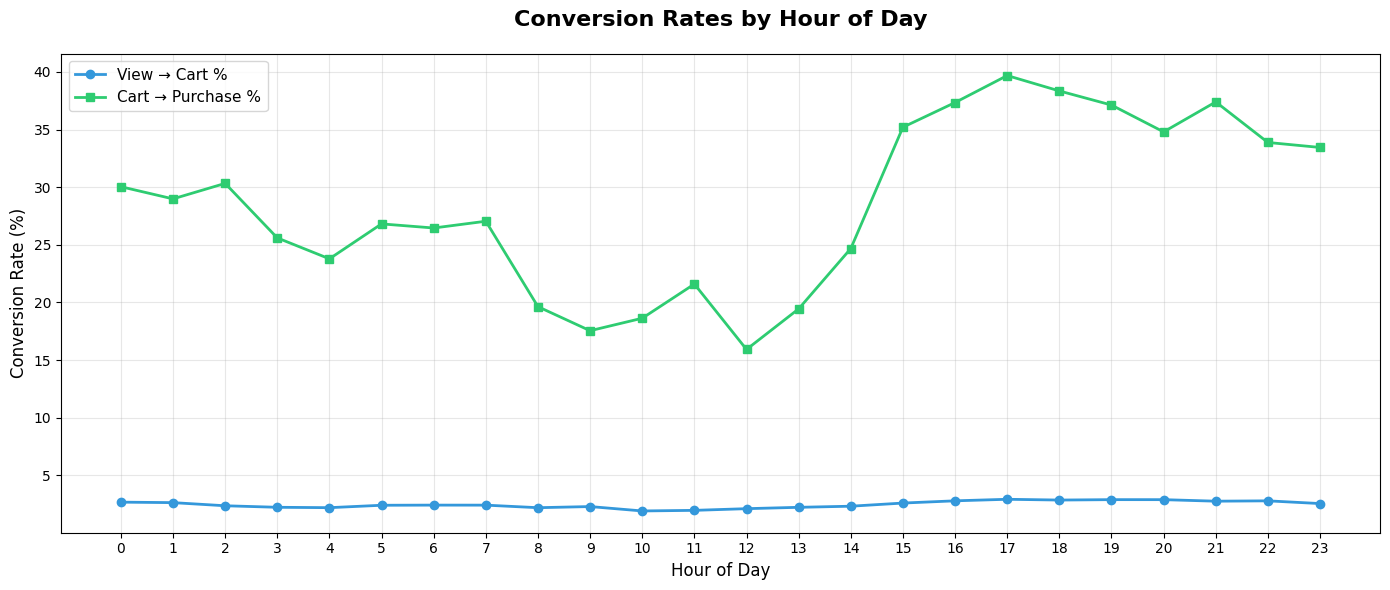

Best conversion hours:
View→Cart: 17:00 (2.92%)
Cart→Purchase: 17:00 (39.68%)


In [39]:
#Conversion rates by hour
hourly_conversions = df.groupby(['hour', 'event']).size().unstack(fill_value=0)
hourly_conversions['view_to_cart_%'] = (hourly_conversions['addtocart'] /  hourly_conversions['view'] * 100)
hourly_conversions['cart_to_purchase_%'] = (hourly_conversions['transaction'] / hourly_conversions['addtocart'] * 100)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hourly_conversions.index, hourly_conversions['view_to_cart_%'], marker='o', linewidth=2, label='View → Cart %', color='#3498db')
ax.plot(hourly_conversions.index, hourly_conversions['cart_to_purchase_%'],marker='s', linewidth=2, label='Cart → Purchase %', color='#2ecc71')

ax.set_title('Conversion Rates by Hour of Day', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Conversion Rate (%)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Best conversion hours:")
print(f"View→Cart: {hourly_conversions['view_to_cart_%'].idxmax()}:00 ({hourly_conversions['view_to_cart_%'].max():.2f}%)")
print(f"Cart→Purchase: {hourly_conversions['cart_to_purchase_%'].idxmax()}:00 ({hourly_conversions['cart_to_purchase_%'].max():.2f}%)")